HW8 Question 4

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import math

In [74]:
def f(X, t, sigma, b, r):
    x, y, z = X  
    return sigma * (y - x), x * (r - z) - y, x * y - b * z  # Derivatives


In [75]:
r = 28.0
sigma = 10.0
b  = 8.0 / 3.0

X0 = [1, 1, 1]  # initial vector X0 = [x(0), y(0), z(0)]
X0epsilon=[1, 0 ,0]

t = np.arange(0.0, 40.0, 0.01)

X1 = odeint(f, X0, t, args=(sigma,b,r))
X2 = odeint(f, X0epsilon, t, args=(sigma,b,r))




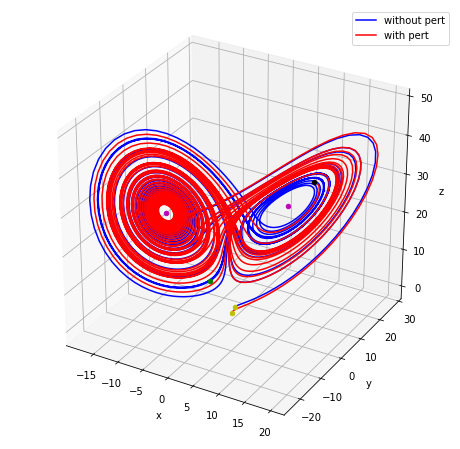

In [151]:
fig = plt.figure(figsize=(8,8))
#ax = fig.gca(projection='3d')

ax = fig.add_subplot(111,projection='3d')

ax.plot(X1[:, 0], X1[:, 1], X1[:, 2], 'b', label="without pert")
ax.scatter(X1[0, 0], X1[0, 1], X1[0, 2] , c='y')     # make a yellow dot at the start
ax.scatter(X1[-1,0], X1[-1,1], X1[-1,2] , c='g')     # make a green dot at the end
ax.set(xlabel='x', ylabel='y', zlabel='z')

ax.plot(X2[:, 0], X2[:, 1], X2[:, 2], 'r', label="with pert")
ax.scatter(X2[0, 0], X2[0, 1], X2[0, 2] , c='y')     # make a yellow dot at the start
ax.scatter(X2[-1,0], X2[-1,1], X2[-1,2] , c='k')     # make a black dot at the end
ax.set(xlabel='x', ylabel='y', zlabel='z')

ax.set(xlabel='x', ylabel='y', zlabel='z')
leg=ax.legend()

# Add markers for the two unstable fixed points:  
X3 = [np.sqrt(b*(r-1)), np.sqrt(b*(r-1)), r-1]
X4 = [-np.sqrt(b*(r-1)), -np.sqrt(b*(r-1)), r-1]
ax.scatter(X3[0], X3[1], X3[2] , c='m')
ax.scatter(X4[0], X4[1], X4[2] , c='m')

In [152]:
distance=[]
for i in range(0,len(X1)):
    dist=math.sqrt(((X1[i][0]-X2[i][0])**2)+((X1[i][1]-X2[i][1])**2)+((X1[i][2]-X2[i][2])**2))
    distance.append(dist)
    
#print(distance)
    

In [153]:
x=np.arange(1,len(distance)+1)
for i in range(0,len(distance)):
    distance[i]=np.log(distance[i])
    #x[i]=round(np.log(x[i]), 2)

#print(distance)


Exponent is  0.0006975289209705658


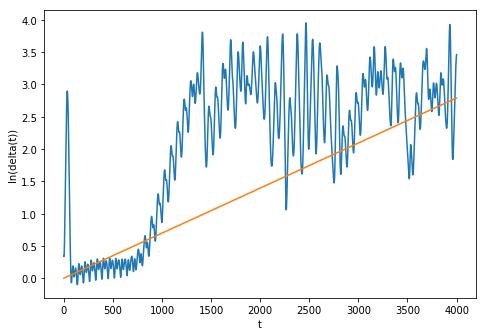

In [174]:
line = np.polyfit(x,distance,1)

xline=[1,len(distance)]
yline=[0,0]
yline[0]=xline[0]*line[0]
yline[1]=xline[1]*line[0]



fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,distance)
ax.plot(xline,yline)
ax.plot()
#ax.plot(x, line)
ax.set_xlabel("t")
ax.set_ylabel("ln(delta(t))")



#print(line)
print("Exponent is ", line[0])